# Exercício de limpeza de dados em Python

## Regras:

- Aparência: sol, nublado, chuva
- Temperatura: -130 ~ 130 F
- Umidade: 0 ~ 100
- Jogar: sim/não 
- Tratar valores NaN



In [1]:
### Importar bibliotecas
import pandas as pd
import seaborn as srn
import statistics as sts

## Importar dataframe

In [2]:
dataset = pd.read_csv('~/Desenvolvimento/Python/Exercícios/Limpar Dados/tempo.csv', sep=';')
dataset.shape

(14, 5)

In [3]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [4]:
dataset.tail()

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim
10,sol,75,70.0,VERDADEIRO,sim
11,nublado,72,90.0,VERDADEIRO,sim
12,nublado,81,75.0,FALSO,sim
13,chuva,71,91.0,VERDADEIRO,nao


## Explorar dados categóricos

In [5]:
agrupado = dataset.groupby(dataset['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [6]:
agrupado = dataset.groupby(dataset['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [7]:
agrupado = dataset.groupby(dataset['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [8]:
dataset.loc[dataset['Aparencia'] == 'menos']

,Aparencia,Temperatura,Umidade,Vento,Jogar
6,menos,64,65.0,VERDADEIRO,sim


In [9]:
dataset.loc[(dataset['Temperatura'] >= 60) & (dataset['Temperatura'] <= 70)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
8,sol,69,70.0,FALSO,sim


In [11]:
dataset.loc[(dataset['Aparencia'] == 'menos'), 'Aparencia'] = 'chuva'
agrupado = dataset.groupby(dataset['Aparencia']).size()
agrupado

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

Com os comandos acima, podemos concluir que:
1. Não existem erros nas colunas Vento e Jogar.
2. Na coluna Aparencia existe um item cadastrado com valor 'menos', que conforme a regra não é um valor válido para a coluna.

Para corrigir, visualizei a linha com erro.
- A partir da temperatura apresentada na linha busquei outros dias com temperaturas próximas.
- Descobri que a moda nesse caso é a chuva.
- A partir das pesquisas acima conclui que o mais indicado é substituir o valor 'menos' por 'chuva'.

## Explorar dados numéricos

In [14]:
dataset[['Temperatura','Umidade']].describe()

,Temperatura,Umidade
count,14.000000,13.000000
mean,155.571429,89.769231
std,306.433759,34.540203
min,64.000000,65.000000
25%,69.250000,70.000000
50%,73.500000,85.000000
75%,80.750000,90.000000
max,1220.000000,200.000000


Com o comando acima podemos concluir quecnos campos temperatura e Umidade a máxima está maior do que o permitido na regra. São dados que devemos corrigir.

Text(0.5, 1.0, 'Temperatura')

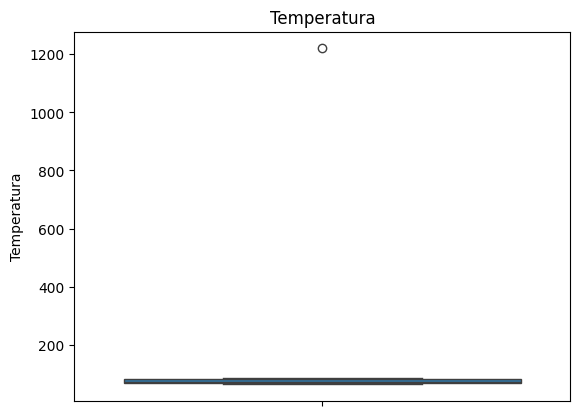

In [16]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Umidade')

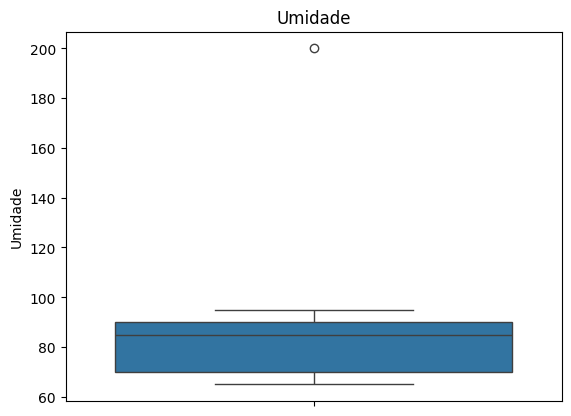

In [17]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

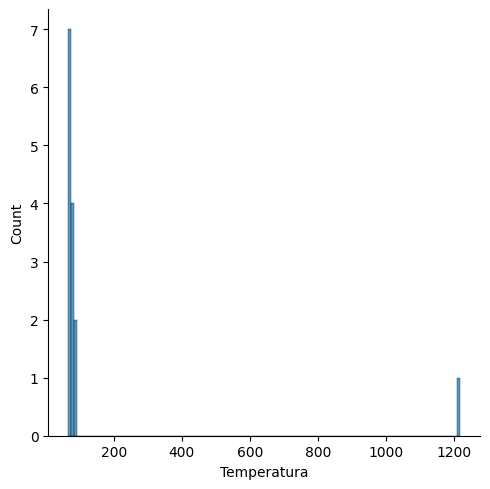

In [18]:
srn.displot(dataset['Temperatura']).set_titles('Temperatura')

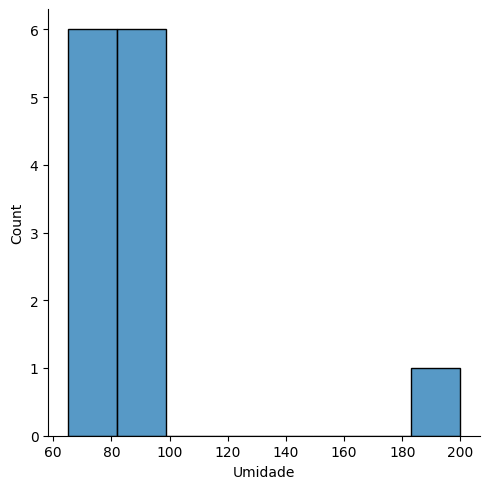

In [19]:
srn.displot(dataset['Umidade']).set_titles('Umidade')

In [20]:
agrupado = dataset.groupby(['Temperatura']).size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

In [21]:
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

No boxplot podemos ver que os dados errados causam uma grande distorção nos gráficos.

Podemos ver também que apenas um registro de Temperatura e um de Umidade estão comprometidos, logo podemos usar a mediana para substituí-los.

In [22]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [23]:
dataset.loc[(dataset['Temperatura'] > 130) | (dataset['Temperatura'] < -130), 'Temperatura'] = mediana

agrupado = dataset.groupby(['Temperatura']).size()
agrupado

/tmp/ipykernel_37811/4121801388.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['Temperatura'] > 130) | (dataset['Temperatura'] < -130), 'Temperatura'] = mediana


Temperatura
64.0    1
65.0    1
68.0    1
69.0    1
70.0    1
71.0    1
72.0    1
73.5    1
75.0    2
80.0    1
81.0    1
83.0    1
85.0    1
dtype: int64

In [24]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [25]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0    1
70.0    3
75.0    1
80.0    1
85.0    1
85.5    1
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

Vejamos os gráficos após a correção.

Text(0.5, 1.0, 'Temperatura')

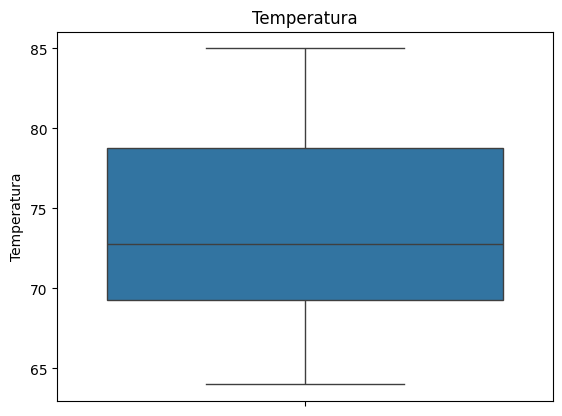

In [26]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Umidade')

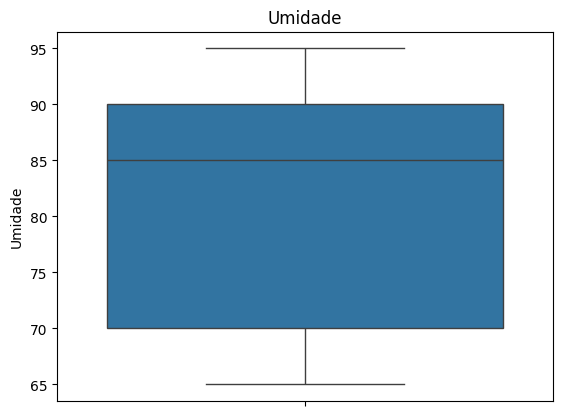

In [27]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

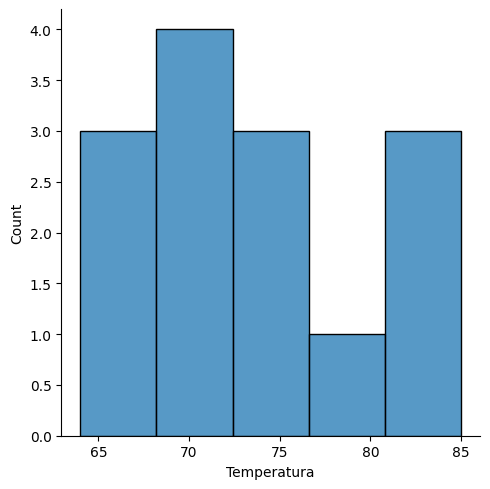

In [28]:
srn.displot(dataset['Temperatura']).set_titles('Temperatura')

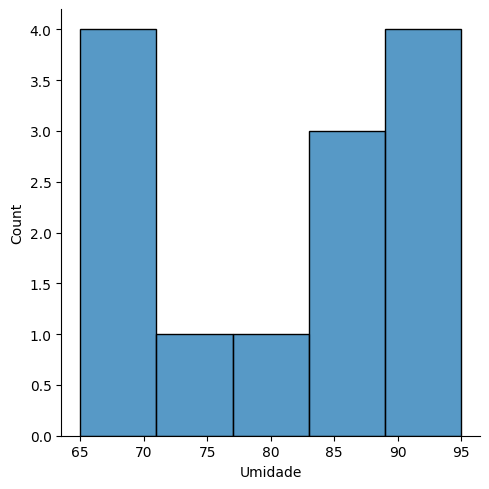

In [29]:
srn.displot(dataset['Umidade']).set_titles('Umidade')